In [1]:
import pandas as pd
import numpy as np

In [3]:
data = {
    'A': [1, 2, 100, 4, 5],
    'B': [3, np.nan, 7, 8, 9],
    'C': [np.nan, 12, 13, 14, 15]
}

In [5]:
df = pd.DataFrame(data)

In [6]:
df

A    B     C
0    1  3.0   NaN
1    2  NaN  12.0
2  100  7.0  13.0
3    4  8.0  14.0
4    5  9.0  15.0

In [7]:
df.isnull().sum()

A    0
B    1
C    1
dtype: int64

In [8]:
#drop all the rows
df.dropna()

A    B     C
2  100  7.0  13.0
3    4  8.0  14.0
4    5  9.0  15.0

In [9]:
#drop a column with missing value
df.dropna(axis=1)

A
0    1
1    2
2  100
3    4
4    5

In [12]:
df['B'].mean()

6.75

In [13]:
#imputation of missing value with mean

df['B'].fillna(df['B'].mean())

0    3.00
1    6.75
2    7.00
3    8.00
4    9.00
Name: B, dtype: float64

In [14]:
#imputing with constant
df['B'].fillna(0)

0    3.0
1    0.0
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [15]:
df['B'].fillna(df['B'].median())

0    3.0
1    7.5
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [16]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [20]:
(df.isnull().sum() / len(df.index))*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [21]:
df.shape

(891, 15)

In [24]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [27]:
df['embark_town'] = df['embark_town'].fillna("Southampton")

In [28]:
df['embark_town'].isna().sum()

0

In [29]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [30]:
df.drop('deck', axis = 1, inplace=True)

In [31]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [32]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  
0      man        True  Southampton    no  False  
1    woman       False    Cherbourg   yes  False  
2    woman       False  Southampton   yes   True  
3    woman       False  Southampton   yes  False  
4      man        True  Southampton    no   True  
..     ...         ...          ...   ...    ...  
886    man        True  Southampton    no   True  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True  

[891 rows x 14 columns]

C:\Users\ajayk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

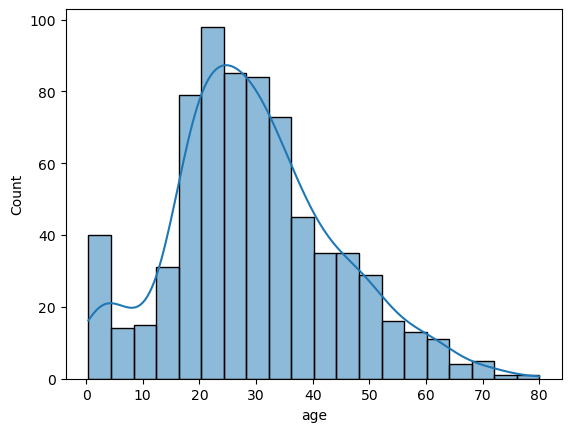

In [33]:
sns.histplot(df.age, kde = True)

In [34]:
#normal dist, no outlier

df['age'].mean()

29.69911764705882

In [35]:
df['age'] = df['age'].fillna(df['age'].mean())

In [36]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [38]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [39]:
df['embarked'] = df['embarked'].fillna("S")

In [40]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [41]:
#homework>> create a separate column with flag 1 and 0

df["flag"]=df.age.apply(lambda x: 1 if pd.isna(x) else 0)

In [42]:
df['flag']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: flag, Length: 891, dtype: int64